#Number1

In [443]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from IPython.display import display

In [ ]:
df=pd.read_csv("/content/data3.zip")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.ocean_proximity=df.ocean_proximity.str.lower().str.replace(' ','_')
df.ocean_proximity

0        near_bay
1        near_bay
2        near_bay
3        near_bay
4        near_bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [ ]:
"""
Select only the features 
from above and fill in the 
missing values with 0.
"""
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.total_bedrooms=df.total_bedrooms.fillna(0)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [ ]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['rooms_per_household'].round(4)

0        6.9841
1        6.2381
2        8.2881
3        5.8174
4        6.2819
          ...  
20635    5.0455
20636    6.1140
20637    5.2055
20638    5.3295
20639    5.2547
Name: rooms_per_household, Length: 20640, dtype: float64

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household'],
      dtype='object')

Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [ ]:
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df.iloc[2:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096


Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [ ]:
df['population_per_household']=df['population']/df['households']
df.iloc[2:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467


#Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [ ]:
df['ocean_proximity'].describe()

count         20640
unique            5
top       <1h_ocean
freq           9136
Name: ocean_proximity, dtype: object

#Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [ ]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)

In [ ]:
df.shape,df_train.shape,df_test.shape,df_val.shape

((20640, 13), (12384, 13), (4128, 13), (4128, 13))

In [ ]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,near_ocean,7.010127,0.139762,2.516456


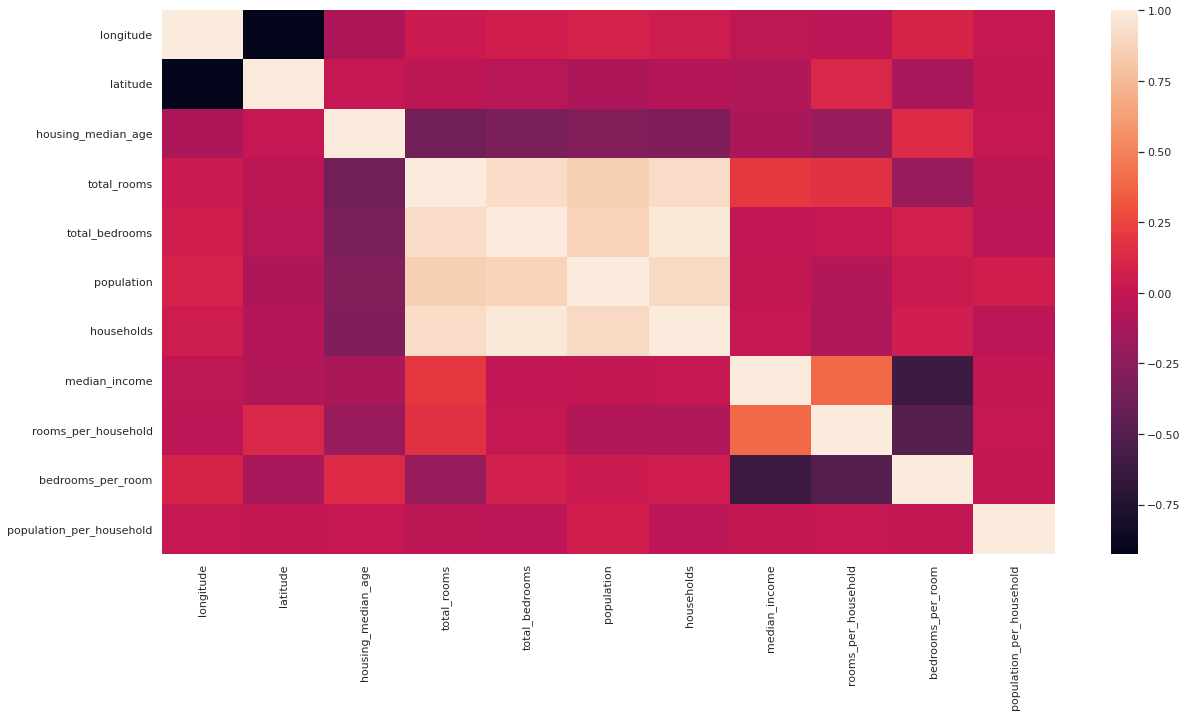

In [ ]:
hi=df_train.drop(columns="median_house_value")
sns.set(rc ={'figure.figsize':(20,10)});
sns.heatmap(hi.corr());

#Make median_house_value binary

We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [ ]:
mean1=df["median_house_value"].mean()

In [ ]:
df_train["above_average"]=(df_train["median_house_value"]>mean1).astype('int')
df_test["above_average"]=(df_test["median_house_value"]>mean1).astype('int')
df_val["above_average"]=(df_val["median_house_value"]>mean1).astype('int')

In [ ]:
del df_train["median_house_value"]
del df_test["median_house_value"]
del df_val["median_house_value"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


#Question 3

Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
Round it to 2 decimals using round(score, 2)
What is their mutual information score?

In [ ]:
(mutual_info_score(df_train['above_average'],df_train['ocean_proximity'])).round(2)

0.1

#Question 4

Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [ ]:
y_train=df_train['above_average'].values
y_test=df_test['above_average'].values
y_val=df_val['above_average'].values

In [ ]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [ ]:
dv=DictVectorizer(sparse=False)

train_dict=df_train.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

In [ ]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
round(model.score(x_val,y_val),2)

0.84

In [ ]:
acc_score=accuracy_score(y_val,model.predict(x_val))
(acc_score).round(2)

0.84

In [ ]:
l

#Question 5

Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?
total_rooms
total_bedrooms
population
households

In [452]:
df_total_room=df_train.drop(columns='total_rooms')
df_total_bedrooms=df_train.drop(columns='total_bedrooms')
df_population=df_train.drop(columns='population')
df_households=df_train.drop(columns='households')

In [453]:
dv=DictVectorizer(sparse=False)

train_dict=df_train.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [454]:
original_score=accuracy_score(y_val,model.predict(x_val))
(original_score).round(4)

0.9891

In [455]:
dv=DictVectorizer(sparse=False)

train_dict=df_total_room.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

total_room_score=accuracy_score(y_val,model.predict(x_val))
(total_room_score).round(4)

0.9901

In [456]:
dv=DictVectorizer(sparse=False)

train_dict=df_total_bedrooms.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

total_bedroom_score=accuracy_score(y_val,model.predict(x_val))
(total_bedroom_score).round(4)

0.9891

In [457]:
dv=DictVectorizer(sparse=False)

train_dict=df_population.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

total_population_score=accuracy_score(y_val,model.predict(x_val))
(total_population_score).round(4)

0.9896

In [458]:
dv=DictVectorizer(sparse=False)

train_dict=df_households.to_dict(orient='records')
x_train=dv.fit_transform(train_dict)

val_dict=df_val.to_dict(orient='records')
x_val=dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(x_train,y_train)

total_household_score=accuracy_score(y_val,model.predict(x_val))
(total_household_score).round(4)

0.9896

In [459]:
a=original_score-total_room_score,
b=original_score-total_bedroom_score,
c=original_score-total_population_score,
d=original_score-total_household_score,
a,b,c,d

((-0.0009689922480620172,),
 (0.0,),
 (-0.0004844961240310086,),
 (-0.0004844961240310086,))

#Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [ ]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)

In [ ]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [460]:
y_train = np.log1p(df_train['median_house_value']).values
y_val = np.log1p(df_val['median_house_value']).values
y_test = np.log1p(df_test['median_house_value']).values

# We drop msrp from our dataset to make them our X features
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
# Encoding categorical variable
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [461]:
alpha_para = [0, 0.01, 0.1, 1, 10]
for p in alpha_para:
    
    # Instantiate model
    model = Ridge(alpha=p, solver="sag", random_state=42)
    
    # Fit model
    model.fit(X_train, y_train)
    
    # predict X_val
    pred = model.predict(X_val)
    
    # RMSE
    mse = mean_squared_error(y_val, pred)
    rmse = round(np.sqrt(mse), 3)

    print('The RMSE of',p, ':', rmse)

The RMSE of 0 : 0.524
The RMSE of 0.01 : 0.524
The RMSE of 0.1 : 0.524
The RMSE of 1 : 0.524
The RMSE of 10 : 0.524
